In [272]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook, tqdm
import pickle

from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter
# from 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [192]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.linear_model import LogisticRegression


## Propensity score prediction

In [383]:
df_cox_causal = pd.read_csv('../data/df_cox_data_death_causal_inference.csv', index_col = 'EMPI')

In [384]:
# treated vs. untreated
pd.crosstab(df_cox_causal.death, df_cox_causal.treated)

treated,0,1
death,,
0.0,1360,1841
1.0,480,264


In [386]:
X = df_cox_causal[set(df_cox_causal.columns) - set(['death', 'survtime', 'treated'])]
y = df_cox_causal['treated']

In [387]:
param_xgb = pd.read_csv('~/Documents/analysis/validation_result/xgb_params_to_run', sep = '\t')
param_xgb.drop(columns = 'Unnamed: 0', inplace = True)
param_xgb = param_xgb.iloc[10:20]
params_xgb = param_xgb.iloc[0:1]

In [388]:
kf = KFold(n_splits=10, shuffle= True)
kf.get_n_splits(X)
result_df = pd.DataFrame(0.0, index = df_cox_causal.index, columns = ['propensity_score'])
f1_list = []
for train_idx, test_idx in tqdm_notebook(kf.split(X), desc = 'Training...'):
    X_test = X.iloc[test_idx]
    X_train = X.iloc[train_idx]
    
    y_test = y.iloc[test_idx]
    y_train = y.iloc[train_idx]
    
#     clf = XGBClassifier(tree_method = 'hist', n_estimators = int(params_xgb['n_estimators']),
#                              max_depth = int(params_xgb['max_depth']), scale_pos_weight = int(params_xgb['scale_pos_weight']), 
#                              learning_rate =float(params_xgb['learning_rate']), verbosity = 0)#, max_depth = 3)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)#, verbose = False)
    y_score = clf.predict_proba(X_test)[:,1]
    result_df.loc[X_test.index, 'propensity_score'] = y_score
    y_pred = clf.predict(X_test)
    display(pd.DataFrame(confusion_matrix(y_test, y_pred)))
    print(classification_report(y_pred, y_test))
    f1_list.append(pd.DataFrame(classification_report(y_pred, y_test, output_dict = True)).at['f1-score', 'macro avg'])
    #     print('train_idx :', test_idx)
print(np.mean(f1_list), np.std(f1_list))

,0,1
0,94,80
1,79,142


              precision    recall  f1-score   support

           0       0.54      0.54      0.54       173
           1       0.64      0.64      0.64       222

    accuracy                           0.60       395
   macro avg       0.59      0.59      0.59       395
weighted avg       0.60      0.60      0.60       395



,0,1
0,111,76
1,59,149


              precision    recall  f1-score   support

           0       0.59      0.65      0.62       170
           1       0.72      0.66      0.69       225

    accuracy                           0.66       395
   macro avg       0.65      0.66      0.66       395
weighted avg       0.66      0.66      0.66       395



,0,1
0,118,71
1,59,147


              precision    recall  f1-score   support

           0       0.62      0.67      0.64       177
           1       0.71      0.67      0.69       218

    accuracy                           0.67       395
   macro avg       0.67      0.67      0.67       395
weighted avg       0.67      0.67      0.67       395



,0,1
0,93,99
1,59,144


              precision    recall  f1-score   support

           0       0.48      0.61      0.54       152
           1       0.71      0.59      0.65       243

    accuracy                           0.60       395
   macro avg       0.60      0.60      0.59       395
weighted avg       0.62      0.60      0.61       395



,0,1
0,98,72
1,58,167


              precision    recall  f1-score   support

           0       0.58      0.63      0.60       156
           1       0.74      0.70      0.72       239

    accuracy                           0.67       395
   macro avg       0.66      0.66      0.66       395
weighted avg       0.68      0.67      0.67       395



,0,1
0,87,98
1,63,146


              precision    recall  f1-score   support

           0       0.47      0.58      0.52       150
           1       0.70      0.60      0.64       244

    accuracy                           0.59       394
   macro avg       0.58      0.59      0.58       394
weighted avg       0.61      0.59      0.60       394



,0,1
0,97,86
1,63,148


              precision    recall  f1-score   support

           0       0.53      0.61      0.57       160
           1       0.70      0.63      0.67       234

    accuracy                           0.62       394
   macro avg       0.62      0.62      0.62       394
weighted avg       0.63      0.62      0.62       394



,0,1
0,93,89
1,64,148


              precision    recall  f1-score   support

           0       0.51      0.59      0.55       157
           1       0.70      0.62      0.66       237

    accuracy                           0.61       394
   macro avg       0.60      0.61      0.60       394
weighted avg       0.62      0.61      0.62       394



,0,1
0,93,100
1,52,149


              precision    recall  f1-score   support

           0       0.48      0.64      0.55       145
           1       0.74      0.60      0.66       249

    accuracy                           0.61       394
   macro avg       0.61      0.62      0.61       394
weighted avg       0.65      0.61      0.62       394



,0,1
0,99,86
1,55,154


              precision    recall  f1-score   support

           0       0.54      0.64      0.58       154
           1       0.74      0.64      0.69       240

    accuracy                           0.64       394
   macro avg       0.64      0.64      0.64       394
weighted avg       0.66      0.64      0.65       394


0.6211935837852092 0.029895161367842156


In [390]:
treated_prop = len(df_cox_causal.loc[df_cox_causal.treated == 1])/len(df_cox_causal)

In [391]:
result_df['treated'] = df_cox_causal.loc[result_df.index, 'treated'].values

In [392]:
for empi in result_df.index:
    # truncating
    if result_df.at[empi, 'propensity_score'] < 0.01:
        result_df.at[empi, 'propensity_score'] = 0.01
    elif result_df.at[empi, 'propensity_score'] > 0.99:
        result_df.at[empi, 'propensity_score'] = 0.99
    # get sw
    if result_df.at[empi, 'treated']:
#         result_df.at[empi, 'sw'] = treated_prop/result_df.at[empi, 'propensity_score']
        result_df.at[empi, 'sw'] = 1/result_df.at[empi, 'propensity_score']
    else:
#         result_df.at[empi, 'sw'] = (1-treated_prop)/(1-result_df.at[empi, 'propensity_score'])
        result_df.at[empi, 'sw'] = 1/(1-result_df.at[empi, 'propensity_score'])

In [393]:
result_df.sw.describe()

count    3945.000000
mean        2.036117
std         1.737698
min         1.010101
25%         1.563345
50%         1.825559
75%         2.224264
max       100.000000
Name: sw, dtype: float64

In [395]:
df_cox_causal['sw'] = result_df.sw.values
df_cox_causal.to_csv('../data/df_cox_data_death_causal_inference_with_sw_modified.csv')

## Plot survival curves

### Entire cohort

In [378]:
treated_survival_curves_unweighted = pd.read_csv('../data/surv_curves_treated_pr_unweighted.csv')
treated_time_steps_unweighted = pd.read_csv('../data/time_steps_treated_unweighted.csv')

untreated_survival_curves_unweighted = pd.read_csv('../data/surv_curves_untreated_pr_unweighted.csv')
untreated_time_steps_unweighted = pd.read_csv('../data/time_steps_untreated_unweighted.csv')

In [379]:
treated_curve_avg_unweighted = np.mean(treated_survival_curves_unweighted.values.T, axis = 0)
untreated_curve_avg_unweighted = np.mean(untreated_survival_curves_unweighted.values.T, axis = 0)

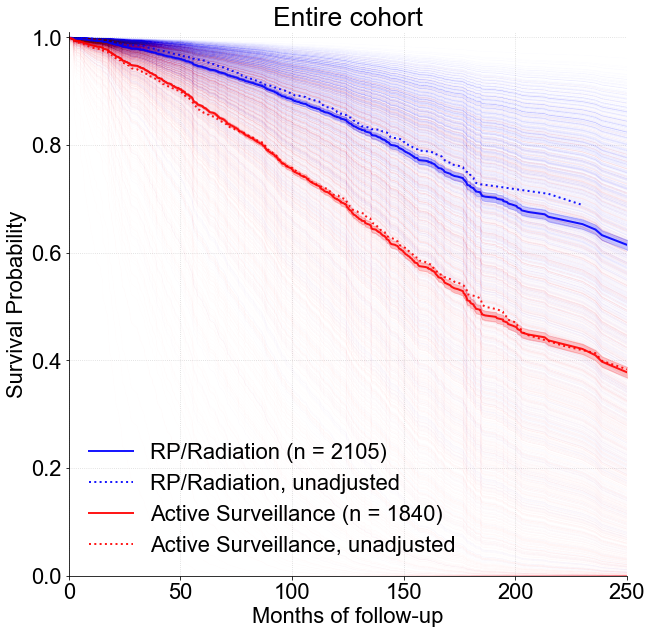

In [412]:
import matplotlib.pyplot as plt
from math import sqrt

treated_survival_curves = pd.read_csv('../data/surv_curves_treated_pr_weighted.csv')
treated_time_steps = pd.read_csv('../data/time_steps_treated.csv')

untreated_survival_curves = pd.read_csv('../data/surv_curves_untreated_pr_weighted.csv')
untreated_time_steps = pd.read_csv('../data/time_steps_untreated.csv')
   
treated_curve_avg = np.mean(treated_survival_curves.values.T, axis = 0)
untreated_curve_avg = np.mean(untreated_survival_curves.values.T, axis = 0)

# km curve
km_treated_survival_curves = pd.read_csv('../data/km_surv_curves_treated.csv').x.values
km_treated_time_steps = pd.read_csv('../data/km_time_steps_treated.csv').x.values

km_untreated_survival_curves = pd.read_csv('../data/km_surv_curves_untreated.csv').x.values
km_untreated_time_steps = pd.read_csv('../data/km_time_steps_untreated.csv').x.values

fig, ax = plt.subplots(figsize = (10, 10))
time_stpes = treated_time_steps.x.values
# df_to_plot = treated_survival_curves
for vals_treated in tqdm_notebook(treated_survival_curves.values.T):
    ax.plot(time_stpes, vals_treated, alpha = 0.01, linewidth = 0.5, color = 'blue')
for vals_untreated in tqdm_notebook(untreated_survival_curves.values.T):
    ax.plot(time_stpes, vals_untreated, alpha = 0.01, linewidth = 0.5, color = 'red')

# ax.set_title('Unemployment Rate Vs Year')
ci_treated = 1.96*treated_survival_curves.std(axis = 1).values/sqrt(np.shape(treated_survival_curves)[1])
ci_untreated = 1.96*treated_survival_curves.std(axis = 1).values/sqrt(np.shape(untreated_survival_curves)[1])

ax.plot(time_stpes, treated_curve_avg, alpha = 0.9, linewidth = 2, color = 'blue', label = 'RP/Radiation (n = {:1})'.format(np.shape(treated_survival_curves)[1]))
# ax.plot(treated_time_steps_unweighted, treated_curve_avg_unweighted, alpha = 0.9, linewidth = 2, linestyle = '--', color = 'blue', label = 'RP/Radiation unweighted (n = {:1})'.format(np.shape(treated_survival_curves)[1]))
ax.plot(km_treated_time_steps, km_treated_survival_curves, alpha = 0.9, linewidth = 2, linestyle = ':', color = 'blue', label = 'RP/Radiation, unadjusted')

ax.plot(time_stpes, untreated_curve_avg, alpha = 0.9, linewidth = 2, color = 'red', label = 'Active Surveillance (n = {:1})'.format(np.shape(untreated_survival_curves)[1]))
# ax.plot(untreated_time_steps_unweighted, untreated_curve_avg_unweighted, alpha = 0.9, linewidth = 2, linestyle = '--',color = 'red', label = 'Active Surveillance unweighted (n = {:1})'.format(np.shape(untreated_survival_curves)[1]))
ax.plot(km_untreated_time_steps, km_untreated_survival_curves, alpha = 0.9, linewidth = 2, linestyle = ':', color = 'red', label = 'Active Surveillance, unadjusted')

ax.fill_between(time_stpes, (treated_curve_avg-ci_treated), (treated_curve_avg+ci_treated), color='blue', alpha=0.2)
ax.fill_between(time_stpes, (untreated_curve_avg-ci_untreated), (untreated_curve_avg+ci_untreated), color='red', alpha=0.2)
    
ax.set_ylim([0, 1.01])
ax.set_xlim([0, 250])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(linestyle = ':', alpha = 0.5)

ax.legend(loc = 'lower left', frameon = False, framealpha = 0)
plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "Arial"

ax.set_xlabel('Months of follow-up')
ax.set_ylabel('Survival Probability')
ax.set_title('Entire cohort')
plt.savefig('../figures/treated_vs_untreated_overall.pdf', bbox_inches='tight')
plt.savefig('../figures/treated_vs_untreated_overall_.png', bbox_inches='tight')
plt.show()

### Overall grade group 1

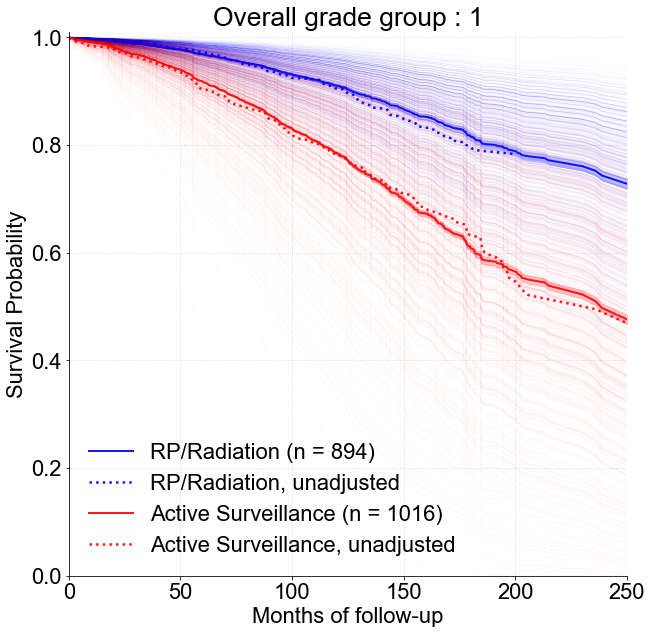

In [413]:
import matplotlib.pyplot as plt

suffix = '_og_1'
treated_survival_curves = pd.read_csv('../data/surv_curves_treated_pr_weighted'+ suffix + '.csv')
treated_time_steps = pd.read_csv('../data/time_steps_treated' + suffix + '.csv')

untreated_survival_curves = pd.read_csv('../data/surv_curves_untreated_pr_weighted' + suffix + '.csv')
untreated_time_steps = pd.read_csv('../data/time_steps_untreated' + suffix + '.csv')
   
treated_curve_avg = np.mean(treated_survival_curves.values.T, axis = 0)
untreated_curve_avg = np.mean(untreated_survival_curves.values.T, axis = 0)

# km curve
km_treated_survival_curves = pd.read_csv('../data/km_surv_curves_treated_pr_weighted'+ suffix + '.csv').x.values
km_treated_time_steps = pd.read_csv('../data/km_time_steps_treated' + suffix + '.csv').x.values

km_untreated_survival_curves = pd.read_csv('../data/km_surv_curves_untreated_pr_weighted' + suffix + '.csv').x.values
km_untreated_time_steps = pd.read_csv('../data/km_time_steps_untreated' + suffix + '.csv').x.values

fig, ax = plt.subplots(figsize = (10, 10))
time_stpes = treated_time_steps.x.values
# df_to_plot = treated_survival_curves
for vals_treated in tqdm_notebook(treated_survival_curves.values.T):
    ax.plot(time_stpes, vals_treated, alpha = 0.025, linewidth = 0.5, color = 'blue')
for vals_untreated in tqdm_notebook(untreated_survival_curves.values.T):
    ax.plot(time_stpes, vals_untreated, alpha = 0.025, linewidth = 0.5, color = 'red')
# ax.set_title('Unemployment Rate Vs Year')
ci_treated = 1.96*treated_survival_curves.std(axis = 1).values/sqrt(np.shape(treated_survival_curves)[1])
ci_untreated = 1.96*treated_survival_curves.std(axis = 1).values/sqrt(np.shape(untreated_survival_curves)[1])

ax.plot(time_stpes, treated_curve_avg, alpha = 0.9, linewidth = 2, color = 'blue', label = 'RP/Radiation (n = {:1})'.format(np.shape(treated_survival_curves)[1]))
ax.plot(km_treated_time_steps, km_treated_survival_curves, alpha = 0.9, linewidth = 2.5, linestyle = ':', color = 'blue', label = 'RP/Radiation, unadjusted')
ax.plot(time_stpes, untreated_curve_avg, alpha = 0.9, linewidth = 2, color = 'red', label = 'Active Surveillance (n = {:1})'.format(np.shape(untreated_survival_curves)[1]))
ax.plot(km_untreated_time_steps, km_untreated_survival_curves, alpha = 0.9, linewidth = 2.5, linestyle = ':', color = 'red', label = 'Active Surveillance, unadjusted')

ax.fill_between(time_stpes, (treated_curve_avg-ci_treated), (treated_curve_avg+ci_treated), color='blue', alpha=0.2)
ax.fill_between(time_stpes, (untreated_curve_avg-ci_untreated), (untreated_curve_avg+ci_untreated), color='red', alpha=0.2)

ax.set_ylim([0, 1.01])
ax.set_xlim([0, 250])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(linestyle = ':', alpha = 0.5)

ax.legend(loc = 'lower left', frameon = False, framealpha = 0)
plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "Arial"

ax.set_xlabel('Months of follow-up')
ax.set_ylabel('Survival Probability')
ax.set_title('Overall grade group : 1')
plt.savefig('../figures/treated_vs_untreated_overall' + suffix + '.pdf', bbox_inches='tight')
plt.savefig('../figures/treated_vs_untreated_overall_' + suffix + '.png', bbox_inches='tight')
plt.show()

### Age > 70

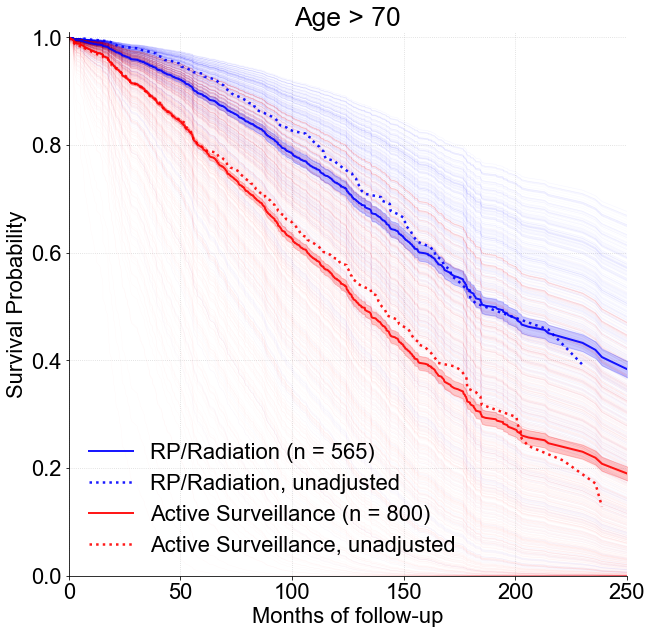

In [414]:
import matplotlib.pyplot as plt

suffix = '_age_70_higher'
treated_survival_curves = pd.read_csv('../data/surv_curves_treated_pr_weighted'+ suffix + '.csv')
treated_time_steps = pd.read_csv('../data/time_steps_treated' + suffix + '.csv')

untreated_survival_curves = pd.read_csv('../data/surv_curves_untreated_pr_weighted' + suffix + '.csv')
untreated_time_steps = pd.read_csv('../data/time_steps_untreated' + suffix + '.csv')
   
treated_curve_avg = np.mean(treated_survival_curves.values.T, axis = 0)
untreated_curve_avg = np.mean(untreated_survival_curves.values.T, axis = 0)

# km curve
km_treated_survival_curves = pd.read_csv('../data/km_surv_curves_treated_pr_weighted'+ suffix + '.csv').x.values
km_treated_time_steps = pd.read_csv('../data/km_time_steps_treated' + suffix + '.csv').x.values

km_untreated_survival_curves = pd.read_csv('../data/km_surv_curves_untreated_pr_weighted' + suffix + '.csv').x.values
km_untreated_time_steps = pd.read_csv('../data/km_time_steps_untreated' + suffix + '.csv').x.values

fig, ax = plt.subplots(figsize = (10, 10))
time_stpes = treated_time_steps.x.values
# df_to_plot = treated_survival_curves
for vals_treated in tqdm_notebook(treated_survival_curves.values.T):
    ax.plot(time_stpes, vals_treated, alpha = 0.025, linewidth = 0.5, color = 'blue')
for vals_untreated in tqdm_notebook(untreated_survival_curves.values.T):
    ax.plot(time_stpes, vals_untreated, alpha = 0.025, linewidth = 0.5, color = 'red')
# ax.set_title('Unemployment Rate Vs Year')
ci_treated = 1.96*treated_survival_curves.std(axis = 1).values/sqrt(np.shape(treated_survival_curves)[1])
ci_untreated = 1.96*treated_survival_curves.std(axis = 1).values/sqrt(np.shape(untreated_survival_curves)[1])

ax.plot(time_stpes, treated_curve_avg, alpha = 0.9, linewidth = 2, color = 'blue', label = 'RP/Radiation (n = {:1})'.format(np.shape(treated_survival_curves)[1]))
ax.plot(km_treated_time_steps, km_treated_survival_curves, alpha = 0.9, linewidth = 2.5, linestyle = ':', color = 'blue', label = 'RP/Radiation, unadjusted')
ax.plot(time_stpes, untreated_curve_avg, alpha = 0.9, linewidth = 2, color = 'red', label = 'Active Surveillance (n = {:1})'.format(np.shape(untreated_survival_curves)[1]))
ax.plot(km_untreated_time_steps, km_untreated_survival_curves, alpha = 0.9, linewidth = 2.5, linestyle = ':', color = 'red', label = 'Active Surveillance, unadjusted')

ax.fill_between(time_stpes, (treated_curve_avg-ci_treated), (treated_curve_avg+ci_treated), color='blue', alpha=0.2)
ax.fill_between(time_stpes, (untreated_curve_avg-ci_untreated), (untreated_curve_avg+ci_untreated), color='red', alpha=0.2)

ax.set_ylim([0, 1.01])
ax.set_xlim([0, 250])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(linestyle = ':', alpha = 0.5)

ax.legend(loc = 'lower left', frameon = False, framealpha = 0)
plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "Arial"

ax.set_xlabel('Months of follow-up')
ax.set_ylabel('Survival Probability')
ax.set_title('Age > 70')
plt.savefig('../figures/treated_vs_untreated_overall' + suffix + '.pdf', bbox_inches='tight')
plt.savefig('../figures/treated_vs_untreated_overall_' + suffix + '.png', bbox_inches='tight')
plt.show()

## Black patients

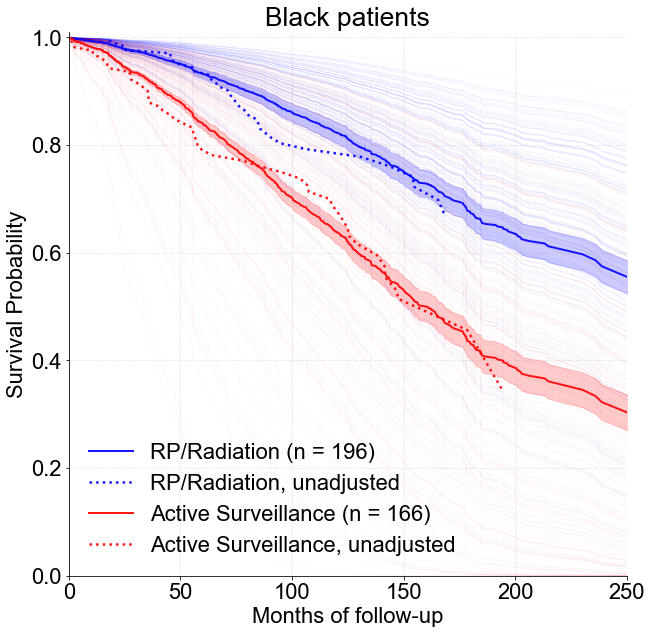

In [415]:
import matplotlib.pyplot as plt

suffix = '_black'
treated_survival_curves = pd.read_csv('../data/surv_curves_treated_pr_weighted'+ suffix + '.csv')
treated_time_steps = pd.read_csv('../data/time_steps_treated' + suffix + '.csv')

untreated_survival_curves = pd.read_csv('../data/surv_curves_untreated_pr_weighted' + suffix + '.csv')
untreated_time_steps = pd.read_csv('../data/time_steps_untreated' + suffix + '.csv')
   
treated_curve_avg = np.mean(treated_survival_curves.values.T, axis = 0)
untreated_curve_avg = np.mean(untreated_survival_curves.values.T, axis = 0)

# km curve
km_treated_survival_curves = pd.read_csv('../data/km_surv_curves_treated_pr_weighted'+ suffix + '.csv').x.values
km_treated_time_steps = pd.read_csv('../data/km_time_steps_treated' + suffix + '.csv').x.values

km_untreated_survival_curves = pd.read_csv('../data/km_surv_curves_untreated_pr_weighted' + suffix + '.csv').x.values
km_untreated_time_steps = pd.read_csv('../data/km_time_steps_untreated' + suffix + '.csv').x.values

fig, ax = plt.subplots(figsize = (10, 10))
time_stpes = treated_time_steps.x.values
# df_to_plot = treated_survival_curves
for vals_treated in tqdm_notebook(treated_survival_curves.values.T):
    ax.plot(time_stpes, vals_treated, alpha = 0.05, linewidth = 0.5, color = 'blue')
for vals_untreated in tqdm_notebook(untreated_survival_curves.values.T):
    ax.plot(time_stpes, vals_untreated, alpha = 0.05, linewidth = 0.5, color = 'red')
# ax.set_title('Unemployment Rate Vs Year')
ci_treated = 1.96*treated_survival_curves.std(axis = 1).values/sqrt(np.shape(treated_survival_curves)[1])
ci_untreated = 1.96*treated_survival_curves.std(axis = 1).values/sqrt(np.shape(untreated_survival_curves)[1])

ax.plot(time_stpes, treated_curve_avg, alpha = 0.9, linewidth = 2, color = 'blue', label = 'RP/Radiation (n = {:1})'.format(np.shape(treated_survival_curves)[1]))
ax.plot(km_treated_time_steps, km_treated_survival_curves, alpha = 0.9, linewidth = 2.5, linestyle = ':', color = 'blue', label = 'RP/Radiation, unadjusted')
ax.plot(time_stpes, untreated_curve_avg, alpha = 0.9, linewidth = 2, color = 'red', label = 'Active Surveillance (n = {:1})'.format(np.shape(untreated_survival_curves)[1]))
ax.plot(km_untreated_time_steps, km_untreated_survival_curves, alpha = 0.9, linewidth = 2.5, linestyle = ':', color = 'red', label = 'Active Surveillance, unadjusted')

ax.fill_between(time_stpes, (treated_curve_avg-ci_treated), (treated_curve_avg+ci_treated), color='blue', alpha=0.2)
ax.fill_between(time_stpes, (untreated_curve_avg-ci_untreated), (untreated_curve_avg+ci_untreated), color='red', alpha=0.2)

ax.set_ylim([0, 1.01])
ax.set_xlim([0, 250])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(linestyle = ':', alpha = 0.5)

ax.legend(loc = 'lower left', frameon = False, framealpha = 0)
plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "Arial"

ax.set_xlabel('Months of follow-up')
ax.set_ylabel('Survival Probability')
ax.set_title('Black patients')
plt.savefig('../figures/treated_vs_untreated_overall' + suffix + '.pdf', bbox_inches='tight')
plt.savefig('../figures/treated_vs_untreated_overall_' + suffix + '.png', bbox_inches='tight')
plt.show()

## AMI

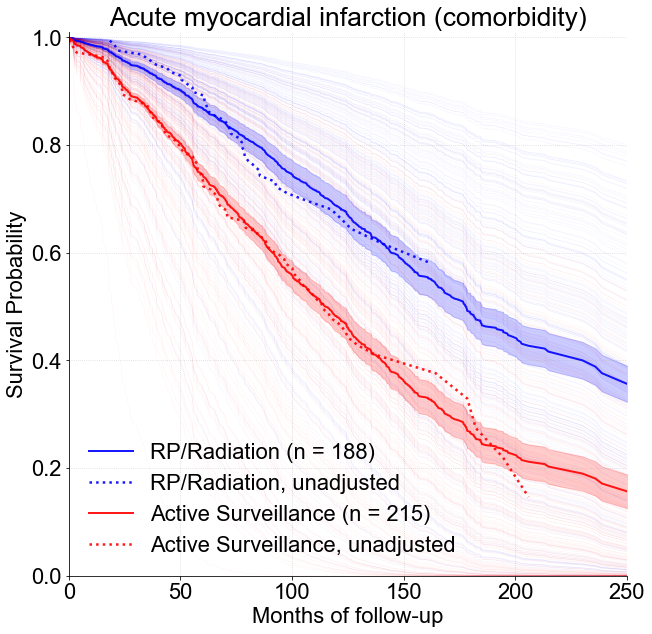

In [416]:
import matplotlib.pyplot as plt

suffix = '_ami'
treated_survival_curves = pd.read_csv('../data/surv_curves_treated_pr_weighted'+ suffix + '.csv')
treated_time_steps = pd.read_csv('../data/time_steps_treated' + suffix + '.csv')

untreated_survival_curves = pd.read_csv('../data/surv_curves_untreated_pr_weighted' + suffix + '.csv')
untreated_time_steps = pd.read_csv('../data/time_steps_untreated' + suffix + '.csv')
   
treated_curve_avg = np.mean(treated_survival_curves.values.T, axis = 0)
untreated_curve_avg = np.mean(untreated_survival_curves.values.T, axis = 0)

# km curve
km_treated_survival_curves = pd.read_csv('../data/km_surv_curves_treated_pr_weighted'+ suffix + '.csv').x.values
km_treated_time_steps = pd.read_csv('../data/km_time_steps_treated' + suffix + '.csv').x.values

km_untreated_survival_curves = pd.read_csv('../data/km_surv_curves_untreated_pr_weighted' + suffix + '.csv').x.values
km_untreated_time_steps = pd.read_csv('../data/km_time_steps_untreated' + suffix + '.csv').x.values


fig, ax = plt.subplots(figsize = (10, 10))
time_stpes = treated_time_steps.x.values
# df_to_plot = treated_survival_curves
for vals_treated in tqdm_notebook(treated_survival_curves.values.T):
    ax.plot(time_stpes, vals_treated, alpha = 0.05, linewidth = 0.5, color = 'blue')
for vals_untreated in tqdm_notebook(untreated_survival_curves.values.T):
    ax.plot(time_stpes, vals_untreated, alpha = 0.05, linewidth = 0.5, color = 'red')
# ax.set_title('Unemployment Rate Vs Year')
ci_treated = 1.96*treated_survival_curves.std(axis = 1).values/sqrt(np.shape(treated_survival_curves)[1])
ci_untreated = 1.96*treated_survival_curves.std(axis = 1).values/sqrt(np.shape(untreated_survival_curves)[1])

ax.plot(time_stpes, treated_curve_avg, alpha = 0.9, linewidth = 2, color = 'blue', label = 'RP/Radiation (n = {:1})'.format(np.shape(treated_survival_curves)[1]))
ax.plot(km_treated_time_steps, km_treated_survival_curves, alpha = 0.9, linewidth = 2.5, linestyle = ':', color = 'blue', label = 'RP/Radiation, unadjusted')
ax.plot(time_stpes, untreated_curve_avg, alpha = 0.9, linewidth = 2, color = 'red', label = 'Active Surveillance (n = {:1})'.format(np.shape(untreated_survival_curves)[1]))
ax.plot(km_untreated_time_steps, km_untreated_survival_curves, alpha = 0.9, linewidth = 2.5, linestyle = ':', color = 'red', label = 'Active Surveillance, unadjusted')

ax.fill_between(time_stpes, (treated_curve_avg-ci_treated), (treated_curve_avg+ci_treated), color='blue', alpha=0.2)
ax.fill_between(time_stpes, (untreated_curve_avg-ci_untreated), (untreated_curve_avg+ci_untreated), color='red', alpha=0.2)

ax.set_ylim([0, 1.01])
ax.set_xlim([0, 250])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(linestyle = ':', alpha = 0.5)

ax.legend(loc = 'lower left', frameon = False, framealpha = 0)
plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "Arial"

ax.set_xlabel('Months of follow-up')
ax.set_ylabel('Survival Probability')
ax.set_title('Acute myocardial infarction (comorbidity)')
plt.savefig('../figures/treated_vs_untreated_overall' + suffix + '.pdf', bbox_inches='tight')
plt.savefig('../figures/treated_vs_untreated_overall_' + suffix + '.png', bbox_inches='tight')
plt.show()

## CHF

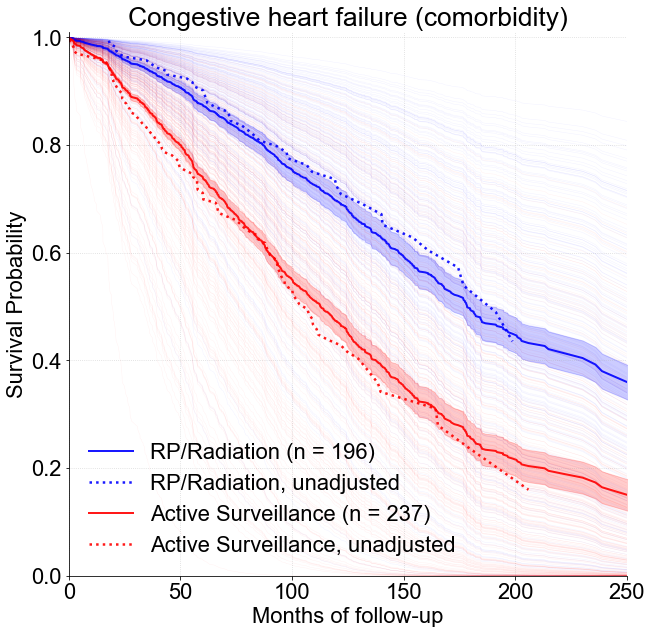

In [417]:
import matplotlib.pyplot as plt

suffix = '_chf'
treated_survival_curves = pd.read_csv('../data/surv_curves_treated_pr_weighted'+ suffix + '.csv')
treated_time_steps = pd.read_csv('../data/time_steps_treated' + suffix + '.csv')

untreated_survival_curves = pd.read_csv('../data/surv_curves_untreated_pr_weighted' + suffix + '.csv')
untreated_time_steps = pd.read_csv('../data/time_steps_untreated' + suffix + '.csv')
   
treated_curve_avg = np.mean(treated_survival_curves.values.T, axis = 0)
untreated_curve_avg = np.mean(untreated_survival_curves.values.T, axis = 0)

# km curve
km_treated_survival_curves = pd.read_csv('../data/km_surv_curves_treated_pr_weighted'+ suffix + '.csv').x.values
km_treated_time_steps = pd.read_csv('../data/km_time_steps_treated' + suffix + '.csv').x.values

km_untreated_survival_curves = pd.read_csv('../data/km_surv_curves_untreated_pr_weighted' + suffix + '.csv').x.values
km_untreated_time_steps = pd.read_csv('../data/km_time_steps_untreated' + suffix + '.csv').x.values


fig, ax = plt.subplots(figsize = (10, 10))
time_stpes = treated_time_steps.x.values
# df_to_plot = treated_survival_curves
for vals_treated in tqdm_notebook(treated_survival_curves.values.T):
    ax.plot(time_stpes, vals_treated, alpha = 0.05, linewidth = 0.5, color = 'blue')
for vals_untreated in tqdm_notebook(untreated_survival_curves.values.T):
    ax.plot(time_stpes, vals_untreated, alpha = 0.05, linewidth = 0.5, color = 'red')
# ax.set_title('Unemployment Rate Vs Year')
ci_treated = 1.96*treated_survival_curves.std(axis = 1).values/sqrt(np.shape(treated_survival_curves)[1])
ci_untreated = 1.96*treated_survival_curves.std(axis = 1).values/sqrt(np.shape(untreated_survival_curves)[1])

ax.plot(time_stpes, treated_curve_avg, alpha = 0.9, linewidth = 2, color = 'blue', label = 'RP/Radiation (n = {:1})'.format(np.shape(treated_survival_curves)[1]))
ax.plot(km_treated_time_steps, km_treated_survival_curves, alpha = 0.9, linewidth = 2.5, linestyle = ':', color = 'blue', label = 'RP/Radiation, unadjusted')
ax.plot(time_stpes, untreated_curve_avg, alpha = 0.9, linewidth = 2, color = 'red', label = 'Active Surveillance (n = {:1})'.format(np.shape(untreated_survival_curves)[1]))
ax.plot(km_untreated_time_steps, km_untreated_survival_curves, alpha = 0.9, linewidth = 2.5, linestyle = ':', color = 'red', label = 'Active Surveillance, unadjusted')

ax.fill_between(time_stpes, (treated_curve_avg-ci_treated), (treated_curve_avg+ci_treated), color='blue', alpha=0.2)
ax.fill_between(time_stpes, (untreated_curve_avg-ci_untreated), (untreated_curve_avg+ci_untreated), color='red', alpha=0.2)

ax.set_ylim([0, 1.01])
ax.set_xlim([0, 250])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(linestyle = ':', alpha = 0.5)

ax.legend(loc = 'lower left', frameon = False, framealpha = 0)
plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "Arial"

ax.set_xlabel('Months of follow-up')
ax.set_ylabel('Survival Probability')
ax.set_title('Congestive heart failure (comorbidity)')
plt.savefig('../figures/treated_vs_untreated_overall' + suffix + '.pdf', bbox_inches='tight')
plt.savefig('../figures/treated_vs_untreated_overall_' + suffix + '.png', bbox_inches='tight')
plt.show()

## COPD

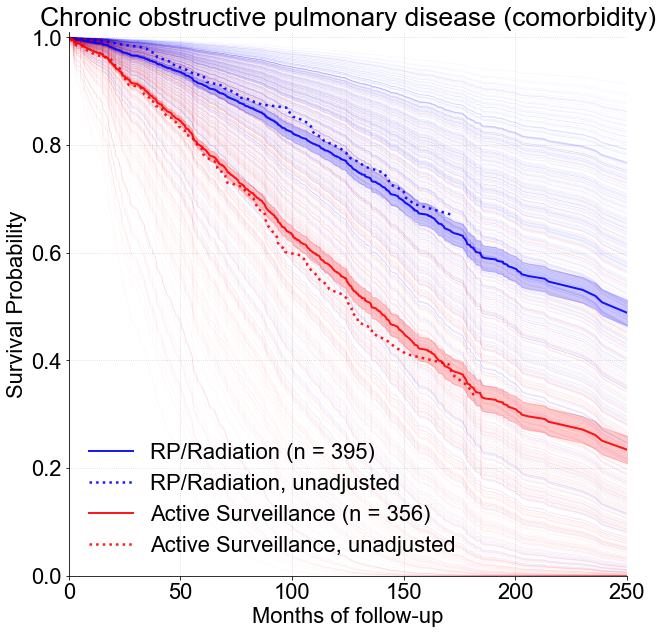

In [418]:
import matplotlib.pyplot as plt

suffix = '_copd'
treated_survival_curves = pd.read_csv('../data/surv_curves_treated_pr_weighted'+ suffix + '.csv')
treated_time_steps = pd.read_csv('../data/time_steps_treated' + suffix + '.csv')

untreated_survival_curves = pd.read_csv('../data/surv_curves_untreated_pr_weighted' + suffix + '.csv')
untreated_time_steps = pd.read_csv('../data/time_steps_untreated' + suffix + '.csv')
   
treated_curve_avg = np.mean(treated_survival_curves.values.T, axis = 0)
untreated_curve_avg = np.mean(untreated_survival_curves.values.T, axis = 0)

# km curve
km_treated_survival_curves = pd.read_csv('../data/km_surv_curves_treated_pr_weighted'+ suffix + '.csv').x.values
km_treated_time_steps = pd.read_csv('../data/km_time_steps_treated' + suffix + '.csv').x.values

km_untreated_survival_curves = pd.read_csv('../data/km_surv_curves_untreated_pr_weighted' + suffix + '.csv').x.values
km_untreated_time_steps = pd.read_csv('../data/km_time_steps_untreated' + suffix + '.csv').x.values


fig, ax = plt.subplots(figsize = (10, 10))
time_stpes = treated_time_steps.x.values
# df_to_plot = treated_survival_curves
for vals_treated in tqdm_notebook(treated_survival_curves.values.T):
    ax.plot(time_stpes, vals_treated, alpha = 0.05, linewidth = 0.5, color = 'blue')
for vals_untreated in tqdm_notebook(untreated_survival_curves.values.T):
    ax.plot(time_stpes, vals_untreated, alpha = 0.05, linewidth = 0.5, color = 'red')
# ax.set_title('Unemployment Rate Vs Year')
ci_treated = 1.96*treated_survival_curves.std(axis = 1).values/sqrt(np.shape(treated_survival_curves)[1])
ci_untreated = 1.96*treated_survival_curves.std(axis = 1).values/sqrt(np.shape(untreated_survival_curves)[1])

ax.plot(time_stpes, treated_curve_avg, alpha = 0.9, linewidth = 2, color = 'blue', label = 'RP/Radiation (n = {:1})'.format(np.shape(treated_survival_curves)[1]))
ax.plot(km_treated_time_steps, km_treated_survival_curves, alpha = 0.9, linewidth = 2.5, linestyle = ':', color = 'blue', label = 'RP/Radiation, unadjusted')
ax.plot(time_stpes, untreated_curve_avg, alpha = 0.9, linewidth = 2, color = 'red', label = 'Active Surveillance (n = {:1})'.format(np.shape(untreated_survival_curves)[1]))
ax.plot(km_untreated_time_steps, km_untreated_survival_curves, alpha = 0.9, linewidth = 2.5, linestyle = ':', color = 'red', label = 'Active Surveillance, unadjusted')

ax.fill_between(time_stpes, (treated_curve_avg-ci_treated), (treated_curve_avg+ci_treated), color='blue', alpha=0.2)
ax.fill_between(time_stpes, (untreated_curve_avg-ci_untreated), (untreated_curve_avg+ci_untreated), color='red', alpha=0.2)

ax.set_ylim([0, 1.01])
ax.set_xlim([0, 250])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(linestyle = ':', alpha = 0.5)

ax.legend(loc = 'lower left', frameon = False, framealpha = 0)
plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "Arial"

ax.set_xlabel('Months of follow-up')
ax.set_ylabel('Survival Probability')
ax.set_title('Chronic obstructive pulmonary disease (comorbidity)')
plt.savefig('../figures/treated_vs_untreated_overall' + suffix + '.pdf', bbox_inches='tight')
plt.savefig('../figures/treated_vs_untreated_overall_' + suffix + '.png', bbox_inches='tight')
plt.show()

## Disease characterization between two cohorts

In [439]:
from sklearn.utils import resample

def perform_bootstrap_prs(vals, vals_ref = None, boot_iter = 5000, alpha = 0.05, get_diff = False):
	if get_diff:
		observed_diff = np.mean(vals) - np.mean(vals_ref)
	else:
		observed_mean = np.median(vals)
	sampled_means = []; sampled_diffs = []
	for i in tqdm(range(boot_iter), desc = 'Bootstrapping...'):
		if get_diff:
			resampled_1 = resample(vals, n_samples = len(vals))
			resampled_2 = resample(vals_ref, n_samples = len(vals_ref))
			sampled_diffs.append(np.mean(resampled_1) - np.mean(resampled_2))
		else:
			resampled_1 = resample(vals, n_samples = len(vals))
			sampled_means.append(np.median(resampled_1))

	if get_diff:
		lower_bound = 2*observed_diff - np.percentile(sampled_diffs, 100*(1-alpha/2))
		upper_bound = 2*observed_diff - np.percentile(sampled_diffs, 100*alpha/2)
		delta_conf_int = (np.round(lower_bound,5), np.round(upper_bound,5))

		sample_se_delta = math.sqrt(1/boot_iter * sum((np.asarray(sampled_diffs) - np.mean(sampled_diffs))**2))
		return observed_diff, delta_conf_int, sample_se_delta
	else:
		lower_bound = 2*observed_mean - np.percentile(sampled_means, 100*(1-alpha/2))
		upper_bound = 2*observed_mean - np.percentile(sampled_means, 100*alpha/2)
		delta_conf_int = (np.round(lower_bound,5), np.round(upper_bound,5))

		sample_se_delta = math.sqrt(1/boot_iter * sum((np.asarray(sampled_means) - np.mean(sampled_means))**2))
		return observed_mean, delta_conf_int, sample_se_delta

In [428]:
df_cox_causal['age'] = df_cox_causal['Age at RP'].values*8.51746168325661 + 65.66058301647655 # un-standardize the data
df_cox_causal['psa_ns'] = df_cox_causal['psa_prior_to_rp'].values*45.855702326166636 + 11.327807351077295
df_cox_causal['auxiiliary_mci_score_ns'] = df_cox_causal['auxiiliary_mci_score'].values*7.445528172024877 + 3.7589936628643863

In [422]:
df_cox_causal['overall_grade_1'] = [1 if val == 1 else 0 for val in df_cox_causal.overall_grade_merged.values]
df_cox_causal['overall_grade_2'] = [1 if val == 2 else 0 for val in df_cox_causal.overall_grade_merged.values]
df_cox_causal['overall_grade_3'] = [1 if val == 3 else 0 for val in df_cox_causal.overall_grade_merged.values]
df_cox_causal['overall_grade_4'] = [1 if val == 4 else 0 for val in df_cox_causal.overall_grade_merged.values]
df_cox_causal['overall_grade_5'] = [1 if val == 5 else 0 for val in df_cox_causal.overall_grade_merged.values]

In [430]:
df_cox_causal_treated = df_cox_causal.loc[df_cox_causal.treated ==1]
df_cox_causal_untreated = df_cox_causal.loc[df_cox_causal.treated ==0]

In [431]:
df_cox_causal_treated_summary = df_cox_causal_treated.describe()
df_cox_causal_untreated_summary = df_cox_causal_untreated.describe()

In [441]:
# perform_bootstrap_prs(df_cox_causal_untreated.psa_ns.values)
perform_bootstrap_prs(df_cox_causal_treated.psa_ns.values)

Bootstrapping...: 100%|██████████| 5000/5000 [00:01<00:00, 4170.72it/s]


(5.5, (5.33, 5.6), 0.06414928975444785)

In [434]:
vars_oi_code = ['age', 'num_pos_cores_sum', 'auxiiliary_mci_score_ns', 'psa_ns','overall_grade_merged', 'overall_grade_1', 'overall_grade_2', 'overall_grade_3', 'overall_grade_4', 
                'overall_grade_5', 'ami_agg', 'chf_agg', 'rend_agg', 'pvd_agg', 'copd_agg', 'diab_agg', 'rend_agg',
                'White', 'Black', 'Asian', 'Hispanic']
df_cox_untreated_oi = df_cox_causal_untreated_summary[vars_oi_code].copy()
df_cox_untreated_oi

ci = 1.96*df_cox_causal_untreated_summary[vars_oi_code].loc['std'].values/sqrt(1840)
df_cox_untreated_oi.loc['ci_minus'] = df_cox_untreated_oi.loc['mean'].values - ci
df_cox_untreated_oi.loc['ci_plus'] = df_cox_untreated_oi.loc['mean'].values + ci
df_cox_untreated_oi

,age,num_pos_cores_sum,auxiiliary_mci_score_ns,psa_ns,overall_grade_merged,overall_grade_1,overall_grade_2,overall_grade_3,overall_grade_4,overall_grade_5,ami_agg,chf_agg,rend_agg,pvd_agg,copd_agg,diab_agg,rend_agg,White,Black,Asian,Hispanic
count,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000
mean,67.399457,3.325000,3.725967,15.207712,1.928804,0.552174,0.203804,0.091848,0.067391,0.084783,0.116848,0.128804,0.097826,0.153261,0.193478,0.172826,0.097826,0.796196,0.090217,0.016304,0.035326
std,8.769026,2.861460,8.242693,65.576651,1.293240,0.497406,0.402935,0.288890,0.250767,0.278634,0.321326,0.335074,0.297160,0.360337,0.395132,0.378200,0.297160,0.402935,0.286571,0.126678,0.184653
min,41.000000,1.000000,0.010000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,1.000000,0.100000,4.117500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,68.000000,2.000000,0.600000,5.800000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,74.000000,4.000000,2.900000,9.402500,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,94.000000,17.000000,65.000000,1589.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ci_minus,66.998776,3.194252,3.349336,12.211335,1.869713,0.529446,0.185393,0.078648,0.055933,0.072051,0.102166,0.113494,0.084248,0.136796,0.175424,0.155545,0.084248,0.777784,0.077123,0.010516,0.026889
ci_plus,67.800137,3.455748,4.102599,18.204089,1.987896,0.574902,0.222216,0.105048,0.078850,0.097514,0.131530,0.144115,0.111404,0.169726,0.211533,0.190107,0.111404,0.814607,0.103312,0.022093,0.043763


In [435]:
# vars_oi_code = ['age', 'overall_grade_merged', 'ami_agg', 'chf_agg', 'rend_agg', 'White', 'Black', 'Asian', 'Hispanic']
df_cox_treated_oi = df_cox_causal_treated_summary[vars_oi_code].copy()
df_cox_treated_oi

ci = 1.96*df_cox_causal_treated_summary[vars_oi_code].loc['std'].values/sqrt(2105)
df_cox_treated_oi.loc['ci_minus'] = df_cox_treated_oi.loc['mean'].values - ci
df_cox_treated_oi.loc['ci_plus'] = df_cox_treated_oi.loc['mean'].values + ci
df_cox_treated_oi

,age,num_pos_cores_sum,auxiiliary_mci_score_ns,psa_ns,overall_grade_merged,overall_grade_1,overall_grade_2,overall_grade_3,overall_grade_4,overall_grade_5,ami_agg,chf_agg,rend_agg,pvd_agg,copd_agg,diab_agg,rend_agg,White,Black,Asian,Hispanic
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,64.140618,3.972447,3.787862,7.936347,2.059857,0.424703,0.295012,0.142043,0.072209,0.066033,0.089311,0.093112,0.076960,0.117815,0.187648,0.170546,0.076960,0.811876,0.093112,0.012352,0.033254
std,7.991214,2.859379,6.675016,12.621536,1.202907,0.494415,0.456156,0.349177,0.258895,0.248399,0.285260,0.290658,0.266591,0.322465,0.390524,0.376201,0.266591,0.390904,0.290658,0.110475,0.179342
min,35.000000,1.000000,0.010000,0.060000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,2.000000,0.250000,4.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,64.000000,3.000000,1.300000,5.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,70.000000,6.000000,4.200000,8.200000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,89.000000,17.000000,70.900000,427.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ci_minus,63.799234,3.850294,3.502706,7.397156,2.008469,0.403582,0.275525,0.127126,0.061149,0.055422,0.077125,0.080695,0.065571,0.104039,0.170965,0.154475,0.065571,0.795177,0.080695,0.007632,0.025593
ci_plus,64.482001,4.094599,4.073018,8.475537,2.111246,0.445824,0.314499,0.156960,0.083269,0.076645,0.101497,0.105529,0.088348,0.131590,0.204332,0.186618,0.088348,0.828576,0.105529,0.017071,0.040916


## Interactive Regression  Causal Model

In [650]:
import numpy as np
import pandas as pd
import doubleml as dml
from doubleml.datasets import fetch_401K

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

from xgboost import XGBClassifier, XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [651]:
def get_performance(df_summary, dml_irm, df_cox, col = None):
    propensity_pred_error = []
    pred_list = []
    true_list = []
    for pred_val, true_val in zip(dml_irm.predictions['ml_m'], df_cox.treated.values):
        propensity_pred_error.append(true_val - pred_val[0][0])
        pred_list.append(pred_val[0][0])
        true_list.append(true_val)
    propensity_rmse = sqrt(sum(np.power(propensity_pred_error,2))/len(propensity_pred_error))
    pred_list_binary = [1 if val >= 0.5 else 0 for val in pred_list]
    print(propensity_rmse)
    print(confusion_matrix(true_list, pred_list_binary))
    f1score = f1_score(true_list, pred_list_binary, average='macro')
    print('f1 score : ',f1score)
    df_summary.at['Propensity prediction (RMSE)', col] = propensity_rmse
    df_summary.at['Propensity prediction (F1)', col] = f1score

    outcome_pred_error = []
    pred_list = []
    true_list = []
    for pred_val, treated_val, true_val in zip(dml_irm.predictions['ml_g1'], df_cox.treated.values, df_cox.death.values):
        if treated_val:
            outcome_pred_error.append(true_val - pred_val[0][0])
            pred_list.append(pred_val[0][0])
            true_list.append(true_val)
    outcome_treated_rmse = sqrt(sum(np.power(outcome_pred_error,2))/len(outcome_pred_error))
    # get binary outcome
    pred_list_binary = [1 if val >= 0.5 else 0 for val in pred_list]
    print(outcome_treated_rmse)
    print(confusion_matrix(true_list, pred_list_binary))
    f1score = f1_score(true_list, pred_list_binary, average='macro')
    print('f1 score', f1score)
    df_summary.at['Outcome prediction, treatment (RMSE)', col] = outcome_treated_rmse
    df_summary.at['Outcome prediction, treatment (F1)', col] = f1score

    outcome_pred_error = []
    pred_list = []
    true_list = []
    for pred_val, treated_val, true_val in zip(dml_irm.predictions['ml_g0'], df_cox.treated.values, df_cox.death.values):
        if not treated_val:
            outcome_pred_error.append(true_val - pred_val[0][0])
            pred_list.append(pred_val[0][0])
            true_list.append(true_val)
    outcome_treated_rmse = sqrt(sum(np.power(outcome_pred_error,2))/len(outcome_pred_error))
    # get binary outcome
    pred_list_binary = [1 if val >= 0.5 else 0 for val in pred_list]
    print(outcome_treated_rmse)
    print(confusion_matrix(true_list, pred_list_binary))
    f1score = f1_score(true_list, pred_list_binary, average='macro')
    print('f1 score', f1score)
    df_summary.at['Outcome prediction, control (RMSE)', col] = outcome_treated_rmse
    df_summary.at['Outcome prediction, control (F1)', col] = f1score
    return df_summary.round(3)

In [652]:
df_cox_causal_new = pd.read_csv('../data/df_cox_data_death_causal_inference.csv', index_col = 'EMPI')
df_cox_causal_new['age_non_stded'] = df_cox_causal_new['Age at RP'].values*8.51746168325661 + 65.66058301647655 # un-standardize the data

In [653]:
# Set up basic model: Specify variables for data-backend
features_base = ['overall_grade_merged', 'num_pos_cores_sum', 'auxiiliary_mci_score', 'ami_agg', 'chf_agg', 
                 'pvd_agg', 'copd_agg', 'pud_agg', 'diab_agg', 'rend_agg', 'Age at RP', 'White', 'Black', 'Asian', 'Hispanic', 'psa_prior_to_rp']

# Initialize DoubleMLData (data-backend of DoubleML)
data_dml_base = dml.DoubleMLData(df_cox_causal_new[features_base + ['death', 'treated']],
                                 y_col='death',
                                 d_cols='treated',
                                 x_cols=features_base)
print(data_dml_base)

=== DoubleMLData Object ===
y_col: death
d_cols: ['treated']
x_cols: ['overall_grade_merged', 'num_pos_cores_sum', 'auxiiliary_mci_score', 'ami_agg', 'chf_agg', 'pvd_agg', 'copd_agg', 'pud_agg', 'diab_agg', 'rend_agg', 'Age at RP', 'White', 'Black', 'Asian', 'Hispanic', 'psa_prior_to_rp']
z_cols: None
data:
 <class 'pandas.core.frame.DataFrame'>
Int64Index: 3945 entries, 101777413 to 101842940
Columns: 18 entries, overall_grade_merged to treated
dtypes: float64(4), int64(14)
memory usage: 585.6 KB



In [654]:
df_result = pd.DataFrame([])

In [655]:
# Lasso
lasso = make_pipeline(StandardScaler(), LassoCV(cv=5, max_iter=20000))

# Initialize DoubleMLIRM model
np.random.seed(123)
dml_irm_lasso = dml.DoubleMLIRM(data_dml_base,
                          ml_g = lasso,
                          ml_m = lasso_class,
                          trimming_threshold = 0.01,
                          n_folds = 10)
dml_irm_lasso.fit(store_predictions=True)
lasso_summary = dml_irm_lasso.summary

display(lasso_summary)
df_result = get_performance(df_result, dml_irm_lasso, df_cox_causal_new, col = 'LASSO')

,coef,std err,t,P>|t|,2.5 %,97.5 %
treated,-0.099023,0.022462,-4.408449,0.00001,-0.143048,-0.054998


0.47792183316343184
[[ 991  849]
 [ 612 1493]]
f1 score :  0.6235623346085151
0.3228924317380588
[[1841    0]
 [ 263    1]]
f1 score 0.47044025157232705
0.41379429210907215
[[1329   31]
 [ 430   50]]
f1 score 0.5152246680828617


In [656]:
# Random Forest
randomForest = RandomForestRegressor(n_estimators=500)
randomForest_class = RandomForestClassifier(n_estimators=500)

np.random.seed(123)
dml_irm_forest = dml.DoubleMLIRM(data_dml_base,
                                 ml_g = randomForest,
                                 ml_m = randomForest_class,
                                 trimming_threshold = 0.01,
                                 n_folds = 10)

# Set nuisance-part specific parameters
dml_irm_forest.set_ml_nuisance_params('ml_g0', 'treated', {
    'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 7})
dml_irm_forest.set_ml_nuisance_params('ml_g1', 'treated', {
    'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 5})
dml_irm_forest.set_ml_nuisance_params('ml_m', 'treated', {
    'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 6})

dml_irm_forest.fit(store_predictions=True)
forest_summary = dml_irm_forest.summary

display(forest_summary)
df_result = get_performance(df_result, dml_irm_forest, df_cox_causal_new, col = 'Random Forest')

,coef,std err,t,P>|t|,2.5 %,97.5 %
treated,-0.086814,0.01197,-7.252625,4.087715e-13,-0.110275,-0.063353


0.47522325594413406
[[ 936  904]
 [ 530 1575]]
f1 score :  0.6267079845307437
0.32311566289016075
[[1841    0]
 [ 264    0]]
f1 score 0.46654840344652815
0.4108417837109775
[[1312   48]
 [ 410   70]]
f1 score 0.5427544551490041


In [657]:
# Trees
trees = DecisionTreeRegressor(max_depth=30)
trees_class = DecisionTreeClassifier(max_depth=30)

np.random.seed(123)
dml_irm_tree = dml.DoubleMLIRM(data_dml_base,
                               ml_g = trees,
                               ml_m = trees_class,
                               trimming_threshold = 0.01,
                               n_folds = 10)

# Set nuisance-part specific parameters
dml_irm_tree.set_ml_nuisance_params('ml_g0', 'treated', {
    'ccp_alpha': 0.0016, 'min_samples_split': 74, 'min_samples_leaf': 24})
dml_irm_tree.set_ml_nuisance_params('ml_g1', 'treated', {
    'ccp_alpha': 0.0018, 'min_samples_split': 70, 'min_samples_leaf': 23})
dml_irm_tree.set_ml_nuisance_params('ml_m', 'treated', {
    'ccp_alpha': 0.0028, 'min_samples_split': 167, 'min_samples_leaf': 55})

dml_irm_tree.fit(store_predictions=True)
tree_summary = dml_irm_tree.summary

display(tree_summary)
df_result = get_performance(df_result, dml_irm_tree, df_cox_causal_new, col = 'Decision Tree')

,coef,std err,t,P>|t|,2.5 %,97.5 %
treated,-0.082179,0.013889,-5.916833,3.282002e-09,-0.1094,-0.054957


0.48073644363081425
[[ 808 1032]
 [ 477 1628]]
f1 score :  0.6002179223504722
0.32782679845662915
[[1841    0]
 [ 264    0]]
f1 score 0.46654840344652815
0.41703771840889203
[[1284   76]
 [ 387   93]]
f1 score 0.5669199473951501


In [658]:
# Boosted Trees
# %pdb on 
boost = XGBRegressor(n_jobs=1, objective = "reg:squarederror")
boost_class = XGBClassifier(use_label_encoder=False, n_jobs=1,
                            objective = "binary:logistic", eval_metric = "logloss")

np.random.seed(123)
dml_irm_boost = dml.DoubleMLIRM(data_dml_base,
                                ml_g = boost,
                                ml_m = boost_class,
                                trimming_threshold = 0.01,
                                n_folds = 10)

# Set nuisance-part specific parameters
dml_irm_boost.set_ml_nuisance_params('ml_g0', 'treated', {
    'eta': 0.1, 'n_estimators': 8})
dml_irm_boost.set_ml_nuisance_params('ml_g1', 'treated', {
    'eta': 0.1, 'n_estimators': 29})
dml_irm_boost.set_ml_nuisance_params('ml_m', 'treated', {
    'eta': 0.1, 'n_estimators': 23})

dml_irm_boost.fit(store_predictions=True)
boost_summary = dml_irm_boost.summary

display(boost_summary)
df_result = get_performance(df_result, dml_irm_boost, df_cox_causal_new, col = 'Boosted Tree')

,coef,std err,t,P>|t|,2.5 %,97.5 %
treated,-0.075196,0.013637,-5.513925,3.509182e-08,-0.101924,-0.048467


0.47438729958069875
[[ 947  893]
 [ 536 1569]]
f1 score :  0.6285350142700967
0.3284021791190383
[[1814   27]
 [ 254   10]]
f1 score 0.49727989502035086
0.43180674157012383
[[1246  114]
 [ 382   98]]
f1 score 0.5586198357979122


In [659]:
df_result

,LASSO,Random Forest,Decision Tree,Boosted Tree
Propensity prediction (RMSE),0.478,0.475,0.481,0.474
Propensity prediction (F1),0.624,0.627,0.600,0.629
"Outcome prediction, treatment (RMSE)",0.323,0.323,0.328,0.328
"Outcome prediction, treatment (F1)",0.470,0.467,0.467,0.497
"Outcome prediction, control (RMSE)",0.414,0.411,0.417,0.432
"Outcome prediction, control (F1)",0.515,0.543,0.567,0.559


## Get Group Average Treatment Effect

In [595]:
df_result_gate = pd.DataFrame([], index = ['ogg1', 'age', 'pvd', 'copd', 'rend_agg', 'pud_agg', 'ami'], columns = ['coef', 'std err', 't', 'P>|t|', '2.5 %', '97.5 %'])

In [614]:
## score funcntion
def gate_orth_score(y, d, g_hat0, g_hat1, m_hat, smpls):
    u_hat0 = y - g_hat0
    u_hat1 = y - g_hat1
    # import age and comorbidity dictionaries
    with open('../data/comorbidities_to_sample_idx_dic.pkl', 'rb') as handle:
        comorbidities_to_sample_idx_dic = pickle.load(handle)
    with open('../data/overall_grade_group_to_sample_idx_dic.pkl', 'rb') as handle:
        overall_grade_group_to_sample_idx_dic = pickle.load(handle)
        
    ogg_1_samples = overall_grade_group_to_sample_idx_dic[1]
    age_samples = comorbidities_to_sample_idx_dic['age']
    pvd_samples = comorbidities_to_sample_idx_dic['pvd']
    copd_samples = comorbidities_to_sample_idx_dic['copd']
    rend_samples = comorbidities_to_sample_idx_dic['rend_agg']
    pud_samples = comorbidities_to_sample_idx_dic['pud_agg']
    ami_samples = comorbidities_to_sample_idx_dic['ami']
    chf_samples = comorbidities_to_sample_idx_dic['chf']
#     breakpoint()
    psi_a = np.zeros(len(y))
    psi_b = np.zeros(len(y))
    samples_oi = chf_samples
    for i in range(len(smpls)):
        train_samples = smpls[i][0]
        p_g_1 = len(set(train_samples) & set(samples_oi))/len(train_samples)
        test_samples = smpls[i][1]
        test_samples_oi = list(set(test_samples) & set(samples_oi))
        psi_b[test_samples_oi] = (g_hat1[test_samples_oi] - g_hat0[test_samples_oi] + np.divide(np.multiply(d[test_samples_oi], u_hat1[test_samples_oi]), m_hat[test_samples_oi]) \
                - np.divide(np.multiply(1.0-d[test_samples_oi], u_hat0[test_samples_oi]), 1.0 - m_hat[test_samples_oi]))/p_g_1
        psi_a[test_samples_oi] = (np.full_like(m_hat[test_samples_oi], -1.0))/p_g_1
#         df_result_compute.loc[test_samples]['psi_b'] = psi_b
#         df_result_compute.loc[test_samples]['psi_a'] = psi_a
#     breakpoint()
    return psi_a, psi_b


In [639]:
# Boosted Trees
# ate
boost = XGBRegressor(n_jobs=1, objective = "reg:squarederror")
boost_class = XGBClassifier(use_label_encoder=False, n_jobs=1,
                            objective = "binary:logistic", eval_metric = "logloss")

np.random.seed(123)
dml_irm_boost = dml.DoubleMLIRM(data_dml_base,
                                ml_g = boost,
                                ml_m = boost_class,
                                trimming_threshold = 0.01,
                                n_folds = 10)

# Set nuisance-part specific parameters
dml_irm_boost.set_ml_nuisance_params('ml_g0', 'treated', {
    'eta': 0.1, 'n_estimators': 8})
dml_irm_boost.set_ml_nuisance_params('ml_g1', 'treated', {
    'eta': 0.1, 'n_estimators': 29})
dml_irm_boost.set_ml_nuisance_params('ml_m', 'treated', {
    'eta': 0.1, 'n_estimators': 23})

dml_irm_boost.fit(store_predictions=True)
boost_summary = dml_irm_boost.summary
ate_boost_summary = boost_summary.copy()
# display(boost_summary)
# df_result_gate.loc['age'] = boost_summary.values

In [598]:
# Boosted Trees
# OGG_1
boost = XGBRegressor(n_jobs=1, objective = "reg:squarederror")
boost_class = XGBClassifier(use_label_encoder=False, n_jobs=1,
                            objective = "binary:logistic", eval_metric = "logloss")

np.random.seed(123)
dml_irm_boost = dml.DoubleMLIRM(data_dml_base,
                                ml_g = boost,
                                ml_m = boost_class,
                                trimming_threshold = 0.01,
                                n_folds = 10, 
                                score = gate_orth_score)

# Set nuisance-part specific parameters
dml_irm_boost.set_ml_nuisance_params('ml_g0', 'treated', {
    'eta': 0.1, 'n_estimators': 8})
dml_irm_boost.set_ml_nuisance_params('ml_g1', 'treated', {
    'eta': 0.1, 'n_estimators': 29})
dml_irm_boost.set_ml_nuisance_params('ml_m', 'treated', {
    'eta': 0.1, 'n_estimators': 23})

dml_irm_boost.fit(store_predictions=True)
boost_summary = dml_irm_boost.summary

display(boost_summary)
df_result_gate.loc['ogg1'] = boost_summary.values

,coef,std err,t,P>|t|,2.5 %,97.5 %
treated,-0.027222,0.018391,-1.480162,0.13883,-0.063269,0.008824


In [600]:
# Boosted Trees
# age
boost = XGBRegressor(n_jobs=1, objective = "reg:squarederror")
boost_class = XGBClassifier(use_label_encoder=False, n_jobs=1,
                            objective = "binary:logistic", eval_metric = "logloss")

np.random.seed(123)
dml_irm_boost = dml.DoubleMLIRM(data_dml_base,
                                ml_g = boost,
                                ml_m = boost_class,
                                trimming_threshold = 0.01,
                                n_folds = 10, 
                                score = gate_orth_score)

# Set nuisance-part specific parameters
dml_irm_boost.set_ml_nuisance_params('ml_g0', 'treated', {
    'eta': 0.1, 'n_estimators': 8})
dml_irm_boost.set_ml_nuisance_params('ml_g1', 'treated', {
    'eta': 0.1, 'n_estimators': 29})
dml_irm_boost.set_ml_nuisance_params('ml_m', 'treated', {
    'eta': 0.1, 'n_estimators': 23})

dml_irm_boost.fit(store_predictions=True)
boost_summary = dml_irm_boost.summary

display(boost_summary)
df_result_gate.loc['age'] = boost_summary.values

,coef,std err,t,P>|t|,2.5 %,97.5 %
treated,-0.120299,0.031603,-3.80651,0.000141,-0.18224,-0.058357


In [604]:
# Boosted Trees
# pvd
boost = XGBRegressor(n_jobs=1, objective = "reg:squarederror")
boost_class = XGBClassifier(use_label_encoder=False, n_jobs=1,
                            objective = "binary:logistic", eval_metric = "logloss")

np.random.seed(123)
dml_irm_boost = dml.DoubleMLIRM(data_dml_base,
                                ml_g = boost,
                                ml_m = boost_class,
                                trimming_threshold = 0.01,
                                n_folds = 10, 
                                score = gate_orth_score)

# Set nuisance-part specific parameters
dml_irm_boost.set_ml_nuisance_params('ml_g0', 'treated', {
    'eta': 0.1, 'n_estimators': 8})
dml_irm_boost.set_ml_nuisance_params('ml_g1', 'treated', {
    'eta': 0.1, 'n_estimators': 29})
dml_irm_boost.set_ml_nuisance_params('ml_m', 'treated', {
    'eta': 0.1, 'n_estimators': 23})

dml_irm_boost.fit(store_predictions=True)
boost_summary = dml_irm_boost.summary

display(boost_summary)
df_result_gate.loc['pvd'] = boost_summary.values

,coef,std err,t,P>|t|,2.5 %,97.5 %
treated,-0.139396,0.044543,-3.129466,0.001751,-0.226699,-0.052093


In [606]:
# Boosted Trees
# copd
boost = XGBRegressor(n_jobs=1, objective = "reg:squarederror")
boost_class = XGBClassifier(use_label_encoder=False, n_jobs=1,
                            objective = "binary:logistic", eval_metric = "logloss")

np.random.seed(123)
dml_irm_boost = dml.DoubleMLIRM(data_dml_base,
                                ml_g = boost,
                                ml_m = boost_class,
                                trimming_threshold = 0.01,
                                n_folds = 10, 
                                score = gate_orth_score)

# Set nuisance-part specific parameters
dml_irm_boost.set_ml_nuisance_params('ml_g0', 'treated', {
    'eta': 0.1, 'n_estimators': 8})
dml_irm_boost.set_ml_nuisance_params('ml_g1', 'treated', {
    'eta': 0.1, 'n_estimators': 29})
dml_irm_boost.set_ml_nuisance_params('ml_m', 'treated', {
    'eta': 0.1, 'n_estimators': 23})

dml_irm_boost.fit(store_predictions=True)
boost_summary = dml_irm_boost.summary

display(boost_summary)
df_result_gate.loc['copd'] = boost_summary.values

,coef,std err,t,P>|t|,2.5 %,97.5 %
treated,-0.127362,0.034592,-3.681851,0.000232,-0.19516,-0.059563


In [608]:
# Boosted Trees
# rend_agg
boost = XGBRegressor(n_jobs=1, objective = "reg:squarederror")
boost_class = XGBClassifier(use_label_encoder=False, n_jobs=1,
                            objective = "binary:logistic", eval_metric = "logloss")

np.random.seed(123)
dml_irm_boost = dml.DoubleMLIRM(data_dml_base,
                                ml_g = boost,
                                ml_m = boost_class,
                                trimming_threshold = 0.01,
                                n_folds = 10, 
                                score = gate_orth_score)

# Set nuisance-part specific parameters
dml_irm_boost.set_ml_nuisance_params('ml_g0', 'treated', {
    'eta': 0.1, 'n_estimators': 8})
dml_irm_boost.set_ml_nuisance_params('ml_g1', 'treated', {
    'eta': 0.1, 'n_estimators': 29})
dml_irm_boost.set_ml_nuisance_params('ml_m', 'treated', {
    'eta': 0.1, 'n_estimators': 23})

dml_irm_boost.fit(store_predictions=True)
boost_summary = dml_irm_boost.summary

display(boost_summary)
df_result_gate.loc['rend_agg'] = boost_summary.values

,coef,std err,t,P>|t|,2.5 %,97.5 %
treated,-0.132474,0.049338,-2.685013,0.007253,-0.229176,-0.035773


In [611]:
# Boosted Trees
# pud_agg
boost = XGBRegressor(n_jobs=1, objective = "reg:squarederror")
boost_class = XGBClassifier(use_label_encoder=False, n_jobs=1,
                            objective = "binary:logistic", eval_metric = "logloss")

np.random.seed(123)
dml_irm_boost = dml.DoubleMLIRM(data_dml_base,
                                ml_g = boost,
                                ml_m = boost_class,
                                trimming_threshold = 0.01,
                                n_folds = 10, 
                                score = gate_orth_score)

# Set nuisance-part specific parameters
dml_irm_boost.set_ml_nuisance_params('ml_g0', 'treated', {
    'eta': 0.1, 'n_estimators': 8})
dml_irm_boost.set_ml_nuisance_params('ml_g1', 'treated', {
    'eta': 0.1, 'n_estimators': 29})
dml_irm_boost.set_ml_nuisance_params('ml_m', 'treated', {
    'eta': 0.1, 'n_estimators': 23})

dml_irm_boost.fit(store_predictions=True)
boost_summary = dml_irm_boost.summary

display(boost_summary)
df_result_gate.loc['pud_agg'] = boost_summary.values

,coef,std err,t,P>|t|,2.5 %,97.5 %
treated,-0.094238,0.107743,-0.874655,0.381762,-0.30541,0.116934


In [613]:
# Boosted Trees
# ami
boost = XGBRegressor(n_jobs=1, objective = "reg:squarederror")
boost_class = XGBClassifier(use_label_encoder=False, n_jobs=1,
                            objective = "binary:logistic", eval_metric = "logloss")

np.random.seed(123)
dml_irm_boost = dml.DoubleMLIRM(data_dml_base,
                                ml_g = boost,
                                ml_m = boost_class,
                                trimming_threshold = 0.01,
                                n_folds = 10, 
                                score = gate_orth_score)

# Set nuisance-part specific parameters
dml_irm_boost.set_ml_nuisance_params('ml_g0', 'treated', {
    'eta': 0.1, 'n_estimators': 8})
dml_irm_boost.set_ml_nuisance_params('ml_g1', 'treated', {
    'eta': 0.1, 'n_estimators': 29})
dml_irm_boost.set_ml_nuisance_params('ml_m', 'treated', {
    'eta': 0.1, 'n_estimators': 23})

dml_irm_boost.fit(store_predictions=True)
boost_summary = dml_irm_boost.summary

display(boost_summary)
df_result_gate.loc['ami'] = boost_summary.values

,coef,std err,t,P>|t|,2.5 %,97.5 %
treated,-0.168399,0.055236,-3.048731,0.002298,-0.27666,-0.060139


In [618]:
# Boosted Trees
# chf
boost = XGBRegressor(n_jobs=1, objective = "reg:squarederror")
boost_class = XGBClassifier(use_label_encoder=False, n_jobs=1,
                            objective = "binary:logistic", eval_metric = "logloss")

np.random.seed(123)
dml_irm_boost = dml.DoubleMLIRM(data_dml_base,
                                ml_g = boost,
                                ml_m = boost_class,
                                trimming_threshold = 0.01,
                                n_folds = 10, 
                                score = gate_orth_score)

# Set nuisance-part specific parameters
dml_irm_boost.set_ml_nuisance_params('ml_g0', 'treated', {
    'eta': 0.1, 'n_estimators': 8})
dml_irm_boost.set_ml_nuisance_params('ml_g1', 'treated', {
    'eta': 0.1, 'n_estimators': 29})
dml_irm_boost.set_ml_nuisance_params('ml_m', 'treated', {
    'eta': 0.1, 'n_estimators': 23})

dml_irm_boost.fit(store_predictions=True)
boost_summary = dml_irm_boost.summary

display(boost_summary)
df_result_gate_chf = pd.DataFrame([], index = ['chf'], columns = ['coef', 'std err', 't', 'P>|t|', '2.5 %', '97.5 %'])
df_result_gate_chf.loc['chf'] = boost_summary.values

,coef,std err,t,P>|t|,2.5 %,97.5 %
treated,-0.15189,0.049865,-3.046033,0.002319,-0.249623,-0.054157


In [620]:
df_gate_total = pd.concat([df_result_gate, df_result_gate_chf])
df_gate_total

,coef,std err,t,P>|t|,2.5 %,97.5 %
ogg1,-0.027222,0.018391,-1.480162,0.13883,-0.063269,0.008824
age,-0.120299,0.031603,-3.80651,0.000141,-0.18224,-0.058357
pvd,-0.139396,0.044543,-3.129466,0.001751,-0.226699,-0.052093
copd,-0.127362,0.034592,-3.681851,0.000232,-0.19516,-0.059563
rend_agg,-0.132474,0.049338,-2.685013,0.007253,-0.229176,-0.035773
pud_agg,-0.094238,0.107743,-0.874655,0.381762,-0.30541,0.116934
ami,-0.168399,0.055236,-3.048731,0.002298,-0.27666,-0.060139
chf,-0.15189,0.049865,-3.046033,0.002319,-0.249623,-0.054157


In [642]:
df_gate_total_final = pd.concat([ate_boost_summary, df_gate_total])
df_gate_total_final

,coef,std err,t,P>|t|,2.5 %,97.5 %
treated,-0.075196,0.013637,-5.513925,0.0,-0.101924,-0.048467
ogg1,-0.027222,0.018391,-1.480162,0.13883,-0.063269,0.008824
age,-0.120299,0.031603,-3.80651,0.000141,-0.18224,-0.058357
pvd,-0.139396,0.044543,-3.129466,0.001751,-0.226699,-0.052093
copd,-0.127362,0.034592,-3.681851,0.000232,-0.19516,-0.059563
rend_agg,-0.132474,0.049338,-2.685013,0.007253,-0.229176,-0.035773
pud_agg,-0.094238,0.107743,-0.874655,0.381762,-0.30541,0.116934
ami,-0.168399,0.055236,-3.048731,0.002298,-0.27666,-0.060139
chf,-0.15189,0.049865,-3.046033,0.002319,-0.249623,-0.054157


### GATE auxiliary 

In [569]:
overall_grade_group_to_sample_idx_dic = {}
comorbidities_to_sample_idx_dic = {}
age_to_sample_idx_dic = {}
idx_counter = 0
for ogg, ami, chf, pvd, copd, pud, rend, age in zip(df_cox_causal_new.overall_grade_merged.values, df_cox_causal_new.ami_agg.values,
                                                   df_cox_causal_new.chf_agg.values,df_cox_causal_new.pvd_agg.values,
                                                   df_cox_causal_new.copd_agg.values,df_cox_causal_new.pud_agg.values,
                                                   df_cox_causal_new.rend_agg.values,df_cox_causal_new['age_non_stded'].values):
    if ogg == 1:
        if ogg in overall_grade_group_to_sample_idx_dic.keys():
            overall_grade_group_to_sample_idx_dic[ogg] = overall_grade_group_to_sample_idx_dic[ogg] + [idx_counter]
        else:
            overall_grade_group_to_sample_idx_dic[ogg] = [idx_counter]
    
    if ami:
        if 'ami' in comorbidities_to_sample_idx_dic.keys():
            comorbidities_to_sample_idx_dic['ami'] = comorbidities_to_sample_idx_dic['ami'] + [idx_counter]
        else:
            comorbidities_to_sample_idx_dic['ami'] = [idx_counter]
            
    if chf:
        if 'chf' in comorbidities_to_sample_idx_dic.keys():
            comorbidities_to_sample_idx_dic['chf'] = comorbidities_to_sample_idx_dic['chf'] + [idx_counter]
        else:
            comorbidities_to_sample_idx_dic['chf'] = [idx_counter]
    
    if pvd:
        if 'pvd' in comorbidities_to_sample_idx_dic.keys():
            comorbidities_to_sample_idx_dic['pvd'] = comorbidities_to_sample_idx_dic['pvd'] + [idx_counter]
        else:
            comorbidities_to_sample_idx_dic['pvd'] = [idx_counter]
            
    if copd:
        if 'copd' in comorbidities_to_sample_idx_dic.keys():
            comorbidities_to_sample_idx_dic['copd'] = comorbidities_to_sample_idx_dic['copd'] + [idx_counter]
        else:
            comorbidities_to_sample_idx_dic['copd'] = [idx_counter]
            
    if pud:
        if 'pud_agg' in comorbidities_to_sample_idx_dic.keys():
            comorbidities_to_sample_idx_dic['pud_agg'] = comorbidities_to_sample_idx_dic['pud_agg'] + [idx_counter]
        else:
            comorbidities_to_sample_idx_dic['pud_agg'] = [idx_counter]
            
    if rend:
        if 'rend_agg' in comorbidities_to_sample_idx_dic.keys():
            comorbidities_to_sample_idx_dic['rend_agg'] = comorbidities_to_sample_idx_dic['rend_agg'] + [idx_counter]
        else:
            comorbidities_to_sample_idx_dic['rend_agg'] = [idx_counter]
        
    if age > 70:
        if 'age' in comorbidities_to_sample_idx_dic.keys():
            comorbidities_to_sample_idx_dic['age'] = comorbidities_to_sample_idx_dic['age'] + [idx_counter]
        else:
            comorbidities_to_sample_idx_dic['age'] = [idx_counter]
    idx_counter += 1
    
# export comorbidity and overall grade dictionary
import pickle

f = open("../data/comorbidities_to_sample_idx_dic.pkl", "wb") 
pickle.dump(comorbidities_to_sample_idx_dic,f)
f.close()

f = open("../data/overall_grade_group_to_sample_idx_dic.pkl", "wb") 
pickle.dump(overall_grade_group_to_sample_idx_dic,f)
f.close()

## Plot GATE

In [643]:
df_gate_total_final

,coef,std err,t,P>|t|,2.5 %,97.5 %
treated,-0.075196,0.013637,-5.513925,0.0,-0.101924,-0.048467
ogg1,-0.027222,0.018391,-1.480162,0.13883,-0.063269,0.008824
age,-0.120299,0.031603,-3.80651,0.000141,-0.18224,-0.058357
pvd,-0.139396,0.044543,-3.129466,0.001751,-0.226699,-0.052093
copd,-0.127362,0.034592,-3.681851,0.000232,-0.19516,-0.059563
rend_agg,-0.132474,0.049338,-2.685013,0.007253,-0.229176,-0.035773
pud_agg,-0.094238,0.107743,-0.874655,0.381762,-0.30541,0.116934
ami,-0.168399,0.055236,-3.048731,0.002298,-0.27666,-0.060139
chf,-0.15189,0.049865,-3.046033,0.002319,-0.249623,-0.054157


In [626]:
%pdb off
df_gate_total.loc[vars_oi_code].coef.values

Automatic pdb calling has been turned OFF


array([-0.027222402795283335, -0.12029873063417111, -0.1393963342948106,
       -0.1273617215947843, -0.13247416002705076, -0.09423789847454289,
       -0.16839940828491087, -0.15188970153381406], dtype=object)

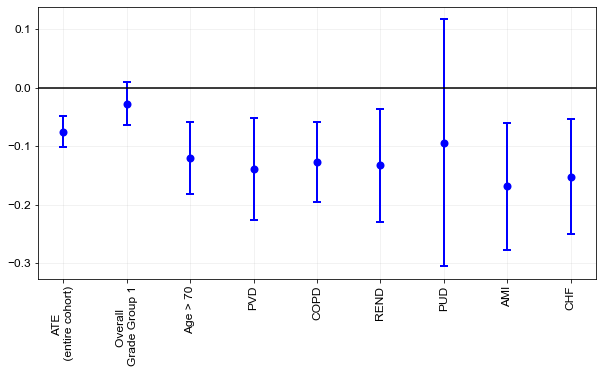

In [649]:
from matplotlib.transforms import Affine2D

vars_oi = ['ATE\n (entire cohort)', 'Overall \nGrade Group 1', 'Age > 70', 'PVD', 'COPD', 'REND', 'PUD', 'AMI', 'CHF']
vars_oi_code = df_gate_total_final.index
fig, ax = plt.subplots(figsize = (10, 5))

plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Arial"

trans1 = Affine2D().translate(-0.00, 0.0) + ax.transData
# trans2 = Affine2D().translate(0.00, 0.0) + ax.transData
trans3 = Affine2D().translate(0.00, 0.0) + ax.transData

er1 = ax.errorbar(vars_oi, df_gate_total_final.loc[vars_oi_code].coef.values, 
                  yerr=[df_gate_total_final.loc[vars_oi_code]['coef'].values - df_gate_total_final.loc[vars_oi_code]['2.5 %'].values, 
                        df_gate_total_final.loc[vars_oi_code]['97.5 %'].values - df_gate_total_final.loc[vars_oi_code]['coef'].values], 
                  marker="o", linestyle="none", transform=trans1, ecolor = 'b', fmt = 'b', markeredgewidth = 2, elinewidth = 2, capsize = 4, label = 'meta sampled CKP matching - CKP matching')
# ax.set_xticklabels(rotation = 90)
ax.grid(':', alpha = 0.2)
ax.axhline(y = 0, color = 'k')
plt.xticks(rotation = 90)
plt.savefig('gate_final.pdf', bbox_inches='tight')
plt.show()